# Creating Empty Mask Datumaro

In [21]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [22]:
# Function to create a color mask
def apply_color_mask(mask, color):
    color_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for i in range(3):  # Apply color to each channel
        color_mask[:, :, i] = mask * color[i]
    return color_mask

In [23]:
# Load the Datumaro JSON file
file_path = '../data/diego/test/diego-thesis-test-datumaro/annotations/default.json'

with open(file_path, 'r') as file:
    data = json.load(file)

In [24]:
# Define directories
image_directory = '../data/diego/test/diego-thesis-test-datumaro/images/default/' # Original Images
mask_directory = '../data/diego/test/diego-thesis-test-datumaro/empty_masks/' # Saved masks
os.makedirs(mask_directory, exist_ok=True)

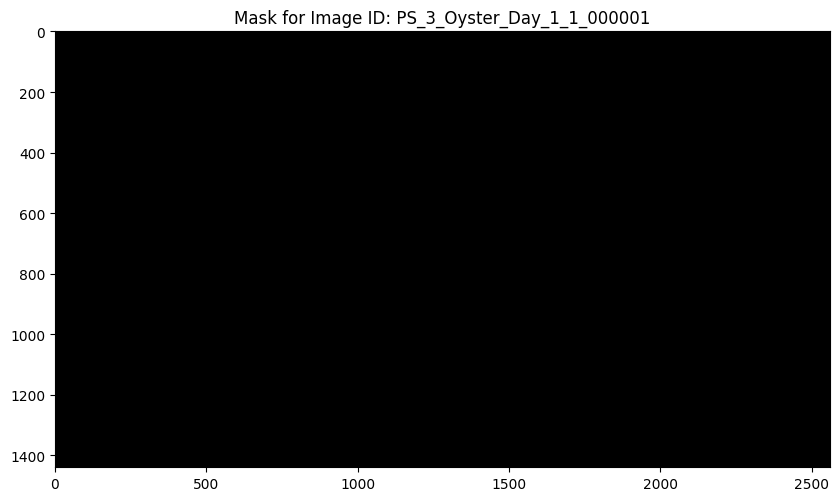

Saved colored mask for image PS_3_Oyster_Day_1_1_000001 as ../data/diego/test/diego-thesis-test-datumaro/empty_masks/mask_PS_3_Oyster_Day_1_1_000001.png


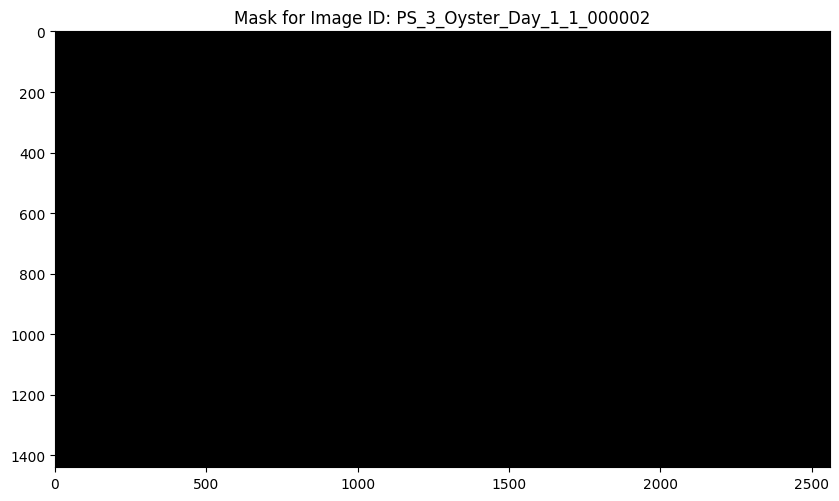

Saved colored mask for image PS_3_Oyster_Day_1_1_000002 as ../data/diego/test/diego-thesis-test-datumaro/empty_masks/mask_PS_3_Oyster_Day_1_1_000002.png


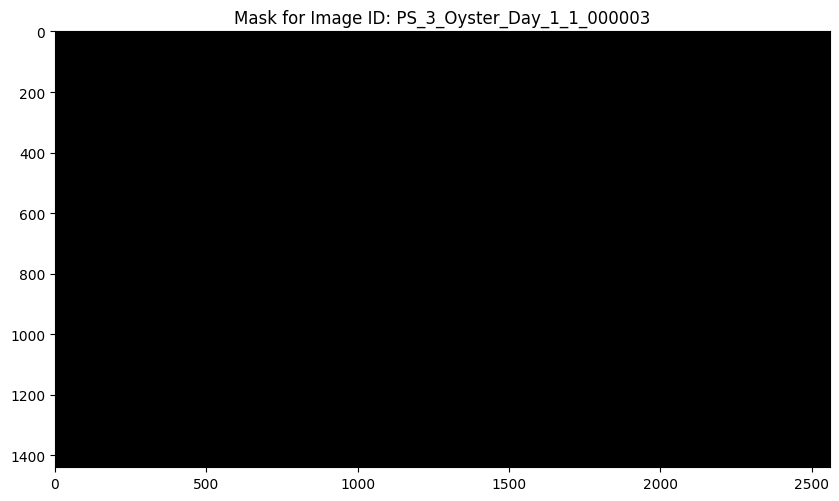

Saved colored mask for image PS_3_Oyster_Day_1_1_000003 as ../data/diego/test/diego-thesis-test-datumaro/empty_masks/mask_PS_3_Oyster_Day_1_1_000003.png


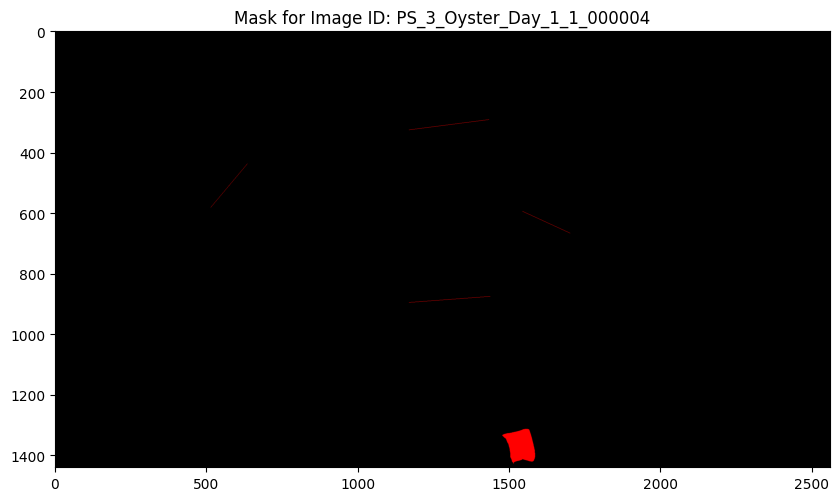

Saved colored mask for image PS_3_Oyster_Day_1_1_000004 as ../data/diego/test/diego-thesis-test-datumaro/empty_masks/mask_PS_3_Oyster_Day_1_1_000004.png


In [25]:
# Loop over items (images)
for item in data["items"]:
    img_id = item["id"]
    img_path = item["image"]["path"]
    img_size = item["image"]["size"]  # [height, width]
    img_height, img_width = img_size
    
    # Initialize an empty mask for the image
    full_mask = np.zeros((img_height, img_width), dtype=np.uint8)

    # Loop over annotations
    for annotation in item["annotations"]:
        
        # Fish that have polylines
        if annotation["type"] == "polyline":
            # Create a blank mask for the polyline
            mask = np.zeros((img_height, img_width), dtype=np.uint8)
            
            # Convert points to integer coordinates
            points = np.array(annotation["points"]).reshape((-1, 2)).astype(np.int32)
            
            # Draw the polyline as a filled polygon
            cv2.fillPoly(mask, [points], 1)

        # Pole that have masks
        elif annotation["type"] == "mask":
            # Decode RLE using pycocotools
            rle = annotation["rle"]
            rle["counts"] = rle["counts"].encode("utf-8")  # Ensure encoding for pycocotools
            mask = maskUtils.decode(rle)
        
        else:
            continue  # Skip unrecognized annotation types

        # Combine the individual mask with the full mask
        full_mask = np.maximum(full_mask, mask)
    
    # Choose a color for the mask (RGB format)
    mask_color = (255, 0, 0)  # Red color
    colored_mask = apply_color_mask(full_mask, mask_color)

    # Display the colored mask
    plt.figure(figsize=(10, 10))
    plt.imshow(colored_mask)
    plt.axis('on')
    plt.title(f"Mask for Image ID: {img_id}")
    plt.show()

    # Save the colored mask
    mask_filename = os.path.join(mask_directory, f"mask_{img_id}.png")
    # cv2.imwrite(mask_filename, cv2.cvtColor(colored_mask, cv2.COLOR_RGB2BGR))
    print(f"Saved colored mask for image {img_id} as {mask_filename}")

# View Masks

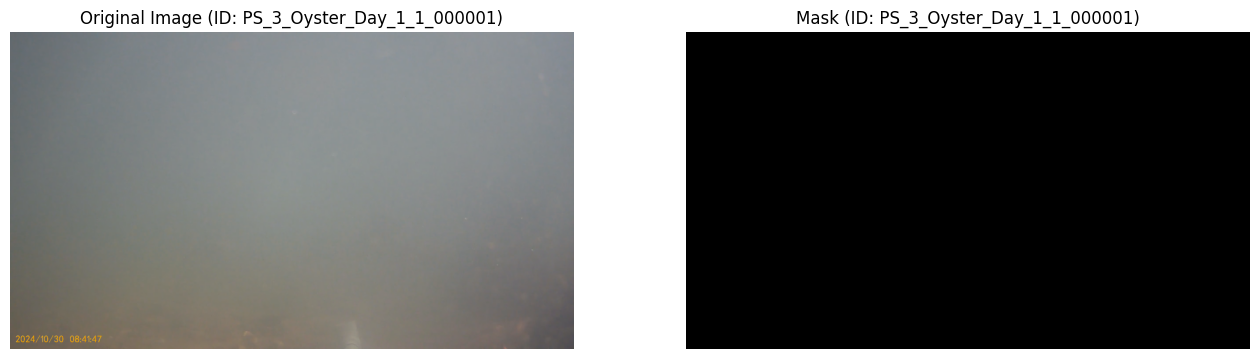

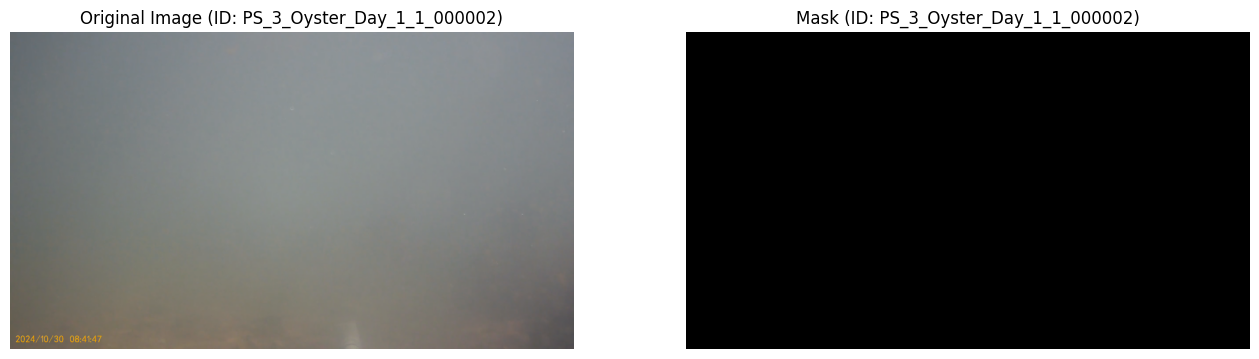

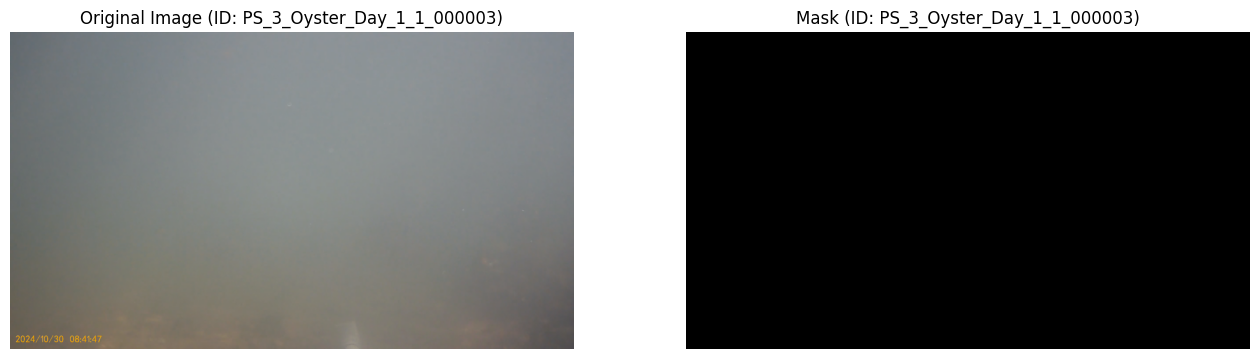

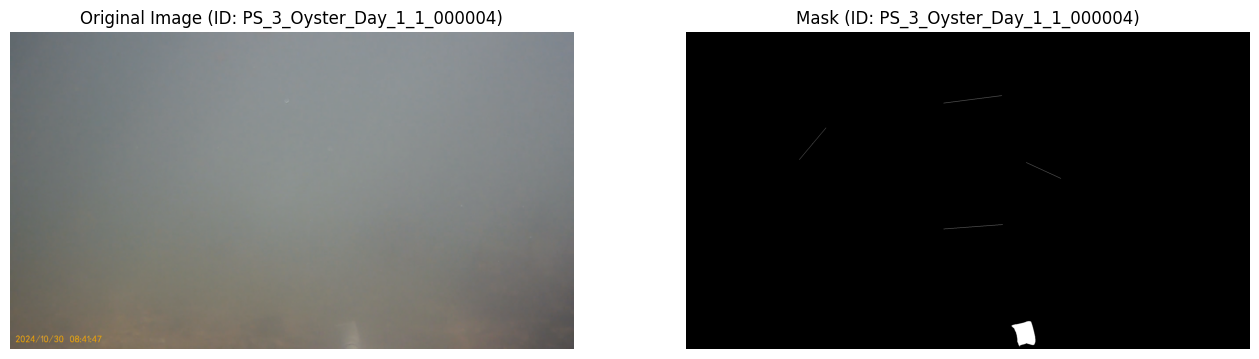

In [27]:
for item in data["items"]:
    img_id = item["id"]
    
    # Load the original image
    img_path = os.path.join('../data/diego/test/diego-thesis-test-datumaro/images/default/', item["image"]["path"])
    original_image = cv2.imread(img_path)
    if original_image is not None:
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Load the corresponding mask
    mask_path = os.path.join(mask_directory, f"mask_{img_id}.png")
    mask_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Check if both images are successfully loaded
    if original_image is not None and mask_image is not None:
        # Display the original image and the mask side by side
        fig, ax = plt.subplots(1, 2, figsize=(16, 8))
        
        ax[0].imshow(original_image)
        ax[0].axis('off')
        ax[0].set_title(f'Original Image (ID: {img_id})')

        ax[1].imshow(mask_image, cmap='gray')
        ax[1].axis('off')
        ax[1].set_title(f'Mask (ID: {img_id})')

        plt.show()
    else:
        print(f"Failed to load images for image ID: {img_id}")
